Image Based Neural Network Approaches

In [ ]:
# Model by Evan Miller
#
# Takes in two inputs corresponding to the images after they have been split into objects and background
# by the YOLO object detection algorithm. These images are processed with a CNN and an RNN+CNN respectively, then they are
# concatenated and fed through some Dense layers for a final prediction.

input1 = tf.keras.Input(shape=(5, 270, 480, 3))
x1 = TimeDistributed(Convolution2D(16, (4,8), data_format='channels_last'))(input1)
x1 = TimeDistributed(Activation('relu'))(x1)
x1 = TimeDistributed(Convolution2D(16, (4,4), data_format='channels_last'))(x1)
x1 = TimeDistributed(Activation('relu'))(x1)
x1 = TimeDistributed(MaxPooling2D(pool_size=(5, 5), data_format='channels_last'))(x1)
x1 = TimeDistributed(Dropout(0.25))(x1)
x1 = TimeDistributed(Convolution2D(12, (3,3), data_format='channels_last'))(x1)
x1 = TimeDistributed(Activation('relu'))(x1)
x1 = TimeDistributed(MaxPooling2D(pool_size=(5, 5), data_format='channels_last'))(x1)
x1 = TimeDistributed(Dropout(0.25))(x1)
x1 = Flatten()(x1)
x1 = Dense(300)(x1)
x1 = Dense(100)(x1)
#x1 = Dense(15, activation='sigmoid')(x1)
x1 = Model(inputs=input1,outputs=x1)
    
input2 = tf.keras.Input(shape=(5, 270, 480, 3))
x2 = TimeDistributed(Convolution2D(32, (4,4), data_format='channels_last'))(input2)
x2 = TimeDistributed(Activation('relu'))(x2)
x2 = TimeDistributed(Convolution2D(32, (4,4), data_format='channels_last'))(x2)
x2 = TimeDistributed(Activation('relu'))(x2)
x2 = TimeDistributed(MaxPooling2D(pool_size=(5, 5), data_format='channels_last'))(x2)
x2 = TimeDistributed(Dropout(0.25))(x2)
x2 = TimeDistributed(Convolution2D(16, (3,3), data_format='channels_last'))(x2)
x2 = TimeDistributed(Activation('relu'))(x2)
x2 = TimeDistributed(MaxPooling2D(pool_size=(5, 5), data_format='channels_last'))(x2)
x2 = TimeDistributed(Dropout(0.25))(x2)
x2 = TimeDistributed(Flatten())(x2)
x2 = GRU(256, kernel_initializer=initializers.RandomNormal(stddev=0.001))(x2)
x2 = Dropout(0.25)(x2)
x2 = Flatten()(x2)
x2 = Dense(100)(x2)
#x2 = Dense(80)(x2)
#x2 = Dense(40)(x2)
#x2 = Dense(15, activation='sigmoid')(x2)
x2 = Model(inputs=input2,outputs=x2)
    
combined = concatenate([x1.output,x2.output])
out = Dense(80)(combined)
out = Dense(40)(out)
out = Dense(15, activation='sigmoid')(out)
    
model = Model(inputs=[x1.input,x2.input], outputs=out)

In [ ]:
# Model by Evan Miller
#
# Takes in 1 input corresponding to the image taken by the drone. This image is processed with a CNN,
# then they are fed through some Dense layers for a final prediction.

input1 = tf.keras.Input(shape=(270, 480, 3))
x1 = Convolution2D(16, (4,8), data_format='channels_last')(input1)
x1 = Activation('relu')(x1)
x1 = Convolution2D(16, (4,4), data_format='channels_last')(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D(pool_size=(5, 5), data_format='channels_last')(x1)
x1 = Dropout(0.25)(x1)
x1 = Convolution2D(12, (3,3), data_format='channels_last')(x1)
x1 = Activation('relu')(x1)
x1 = MaxPooling2D(pool_size=(5, 5), data_format='channels_last')(x1)
x1 = Dropout(0.25)(x1)
x1 = Flatten()(x1)
x1 = Dense(300)(x1)
x1 = Dense(100)(x1)
x1 = Dense(15, activation='sigmoid')(x1)
x1 = Model(inputs=input1,outputs=x1)

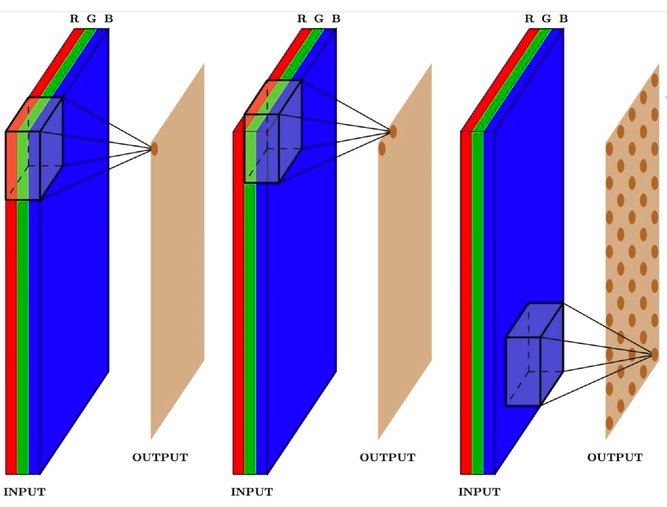

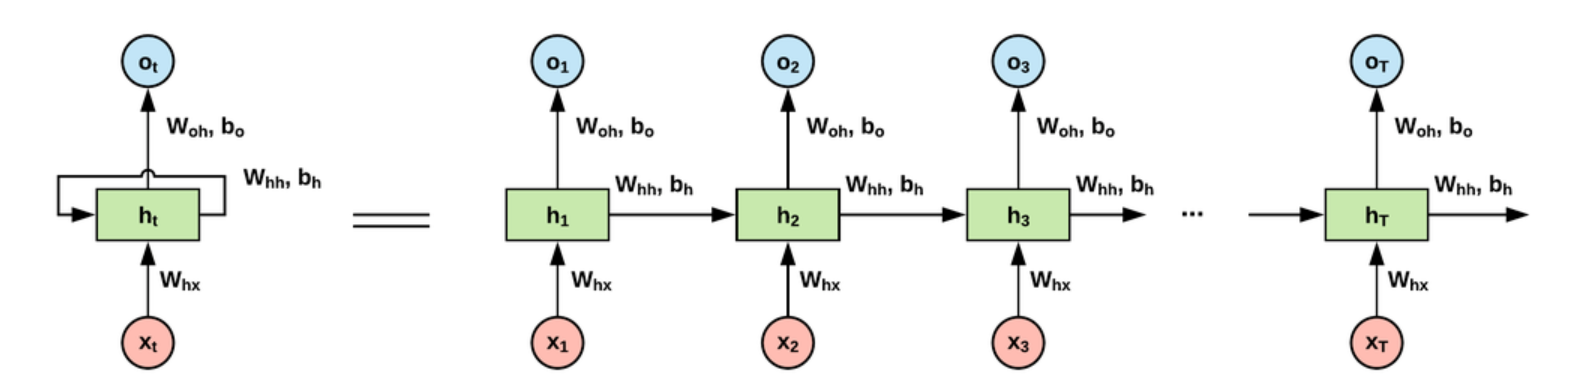

Pathfinding Based Approaches

SA and IMU

Source: https://ieeexplore.ieee.org/document/7367607?reload=true&arnumber=7367607

SA pathfinding algorithm. white cells mean empty cells, black cells represent the obstacles, the green cell is the start position and finally the red cell is the goal position

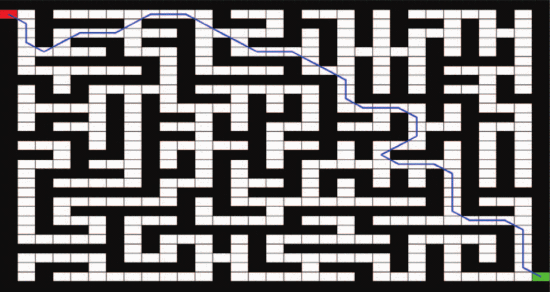

Algorithm to convert vectors between waypoints and current telemetrics to drone manuevers (I don't know how to do this)